In [114]:
import pandas as pd
from FileManager import FileManager
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot

In [115]:
fileManager = FileManager()

In [116]:
df = pd.read_csv(fileManager._get_path_global_csv_file()).set_index("id_micro")
#column_X = ["f_2", "f_3", "M1,1"]#, "M1,2", "M1,3", "M1,4", "M1,5", "M1,6", "M2,2", "M2,3", "M2,4", "M2,5", "M2,6", "M3,3", "M3,4", "M3,5", "M3,6", "M4,4", "M4,5", "M4,6", "M5,5", "M5,6", "M6,6"]
#column_X = ["M1,1"] #around 0.6
#column_X = ["f_2", "f_3"]
#column_X = ["f_2", "f_3", "M1,1"] #around 0.7
#column_X = ["f_2", "f_3", "M1,1", "M2,2", "M3,3", "M4,4", "M5,5", "M6,6"] #above 0.7
column_X = ["M1,1", "M1,2", "M1,3", "M1,4", "M1,5", "M1,6", "M2,2", "M2,3", "M2,4", "M2,5", "M2,6", "M3,3", "M3,4", "M3,5", "M3,6", "M4,4", "M4,5", "M4,6", "M5,5", "M5,6", "M6,6", "f_2", "f_3"] # above 0.8
column_Y = ["last_sigma"]
X = df[column_X]
y = df[column_Y]

In [117]:
train, test = train_test_split(df, test_size=0.2)
X_train, X_val = train[column_X], test[column_X]
y_train, y_val = train[column_Y], test[column_Y]
std_scaler = StandardScaler()
y_train_scaled = std_scaler.fit_transform(y_train)
y_val_scaled = std_scaler.transform(y_val)

In [118]:
Reg = make_pipeline(StandardScaler(), linear_model.LinearRegression())
Reg.fit(X_train, y_train_scaled.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [119]:
Reg.score(X_train, y_train_scaled.ravel())

0.8521003522985199

In [120]:
Reg.score(X_val, y_val_scaled.ravel())

0.8434430998023386

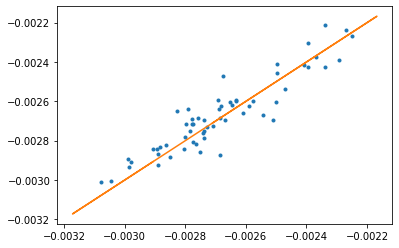

In [121]:
y_predict_scaled = Reg.predict(X_val)
plt.plot(y_val, std_scaler.inverse_transform(y_predict_scaled.reshape(-1,1)), ".")
plt.plot(y,y)

In [185]:
importance = np.asarray(Reg[1].coef_)

In [192]:
importance

array([-9.87824592e-01,  6.29807440e-01,  8.75592733e-01,  2.12032429e+00,
       -3.00015592e+00,  4.48110601e-01,  3.41020532e-02, -9.89721035e-03,
        1.97151801e-03,  1.97553643e+00, -1.44972020e-02,  2.24515042e-01,
       -1.94005861e-02,  1.63769027e-01, -1.95402337e+00,  2.77082118e-02,
        2.85744510e-02, -2.42340337e-01, -2.00677048e-01, -1.49524727e-02,
       -1.35780299e+00,  7.18597204e-02, -4.97421629e-01])

In [198]:
labels_bar_plot = [column_X[i][1:] for i in range(len(column_X)-2)] + column_X[-2:]

In [201]:
from turtle import color


fig, ax = plt.subplots(figsize=(20,20))
plt.bar(labels_bar_plot, importance)
ax.tick_params(axis="both", labelsize=22)
fig.savefig("/home/vludvig/nas/stage/python/clustering_v1/experiments/experiment2/images/linear_regression_coefficient")
plt.xticks(rotation = 45)

ModuleNotFoundError: No module named 'tkinter'

In [124]:
importance

array([-9.87824592e-01,  6.29807440e-01,  8.75592733e-01,  2.12032429e+00,
       -3.00015592e+00,  4.48110601e-01,  3.41020532e-02, -9.89721035e-03,
        1.97151801e-03,  1.97553643e+00, -1.44972020e-02,  2.24515042e-01,
       -1.94005861e-02,  1.63769027e-01, -1.95402337e+00,  2.77082118e-02,
        2.85744510e-02, -2.42340337e-01, -2.00677048e-01, -1.49524727e-02,
       -1.35780299e+00,  7.18597204e-02, -4.97421629e-01])

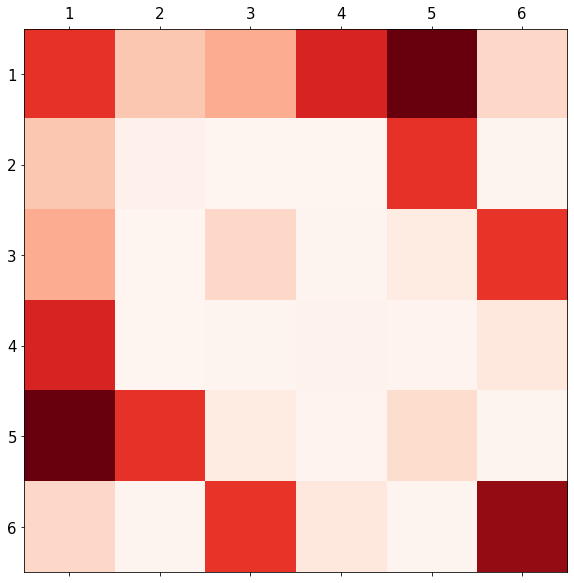

In [178]:
import re
matrix = np.zeros((6,6))
for m in range (len(column_X)-2):
    i = int(column_X[m][1])
    j = int(column_X[m][3])
    matrix[i-1,j-1] = abs(importance[m])
matrix += np.transpose(matrix)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, cmap=plt.cm.Reds)
ax.set_xticks(np.arange(6))
ax.set_xticklabels(np.arange(1,7))
ax.set_yticks(np.arange(6))
ax.set_yticklabels(np.arange(1,7))
ax.tick_params(axis="both", labelsize=15)
fig.savefig("/home/vludvig/nas/stage/python/clustering_v1/experiments/experiment2/images/linear_regression_matrix.png")
#plt.title("Elasticity matrix linear regression")

Text(0.5, 1.0, 'Importance of features on the validation set')

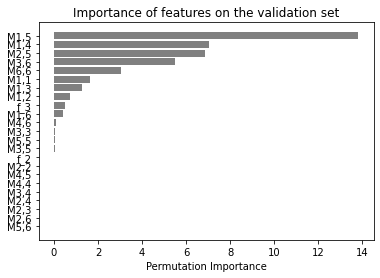

In [125]:
r_train = permutation_importance(Reg, X_val, y_val_scaled, n_repeats=100)
features = np.array(column_X)
sorted_idx_train = r_train.importances_mean.argsort()
plt.barh(features[sorted_idx_train], r_train.importances_mean[sorted_idx_train], color="gray")
plt.xlabel("Permutation Importance")
plt.title("Importance of features on the validation set")